# 导入所需库

In [2]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 加载波士顿住房数据集

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# 问题 1：以查尔斯河为界的房屋中值是否存在明显差异？

In [4]:
charles_river_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_charles_river_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_statistic, p_value = stats.ttest_ind(charles_river_houses, non_charles_river_houses)
if p_value < 0.05:
    print("以查尔斯河为界的房屋中值存在明显差异")
else:
    print("以查尔斯河为界的房屋中值不存在明显差异")

以查尔斯河为界的房屋中值存在明显差异


# 问题 2：建于 1940 年之前的自住单位（AGE）的各比例房屋价值中值（MEDV）是否存在差异？

In [5]:
age_group_1 = boston_df[boston_df['AGE'] <= 35]['MEDV']
age_group_2 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
age_group_3 = boston_df[boston_df['AGE'] > 70]['MEDV']
f_statistic, p_value = stats.f_oneway(age_group_1, age_group_2, age_group_3)
if p_value < 0.05:
    print("建于 1940 年之前的自住单位的不同比例的房屋价值中值存在差异")
else:
    print("建于 1940 年之前的自住单位的不同比例的房屋价值中值不存在差异")

建于 1940 年之前的自住单位的不同比例的房屋价值中值存在差异


# 问题 3：一氧化氮浓度与每个城镇的非零售商业亩数比例之间是否存在关系？

C:\Users\Nurbek\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nurbek\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38646 (\N{CJK UNIFIED IDEOGRAPH-96F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nurbek\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21806 (\N{CJK UNIFIED IDEOGRAPH-552E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nurbek\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nurbek\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(b

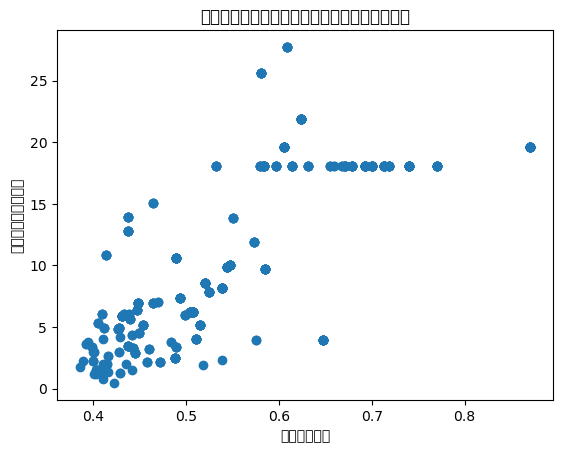

In [6]:
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.xlabel('一氧化氮浓度')
plt.ylabel('非零售商业亩数比例')
plt.title('一氧化氮浓度与非零售商业亩数比例之间的关系')
plt.show()

# 问题 4：波士顿五个就业中心的额外加权距离对自住房屋的中值有何影响？

In [7]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        17:03:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0